In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
data = pd.read_csv(r'C:\Users\Mannahil Miftah\Downloads\country_vaccinations.csv')
data.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,40.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,45.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,50.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [3]:
data.shape

(86512, 15)

In [4]:
data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [5]:
data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [6]:
data.info

<bound method DataFrame.info of            country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
86507     Zimbabwe      ZWE  2022-03-25           8691642.0   
86508     Zimbabwe      ZWE  2022-03-26           8791728.0   
86509     Zimbabwe      ZWE  2022-03-27           8845039.0   
86510     Zimbabwe      ZWE  2022-03-28           8934360.0   
86511     Zimbabwe      ZWE  2022-03-29           9039729.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN        

In [7]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
std,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000


In [8]:
data.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [9]:
data.dropna(inplace = True)

In [10]:
data.shape

(30847, 15)

In [11]:
data['date'] = pd.to_datetime(data['date'])

In [16]:
top_10_countries = pd.DataFrame(data.groupby('country')['total_vaccinations'].sum()).reset_index()
top_10_countries = top_10_countries.sort_values(by = 'total_vaccinations', ascending=False)
top_10_countries

,country,total_vaccinations
72,India,3.200418e+11
162,United States,1.550138e+11
19,Brazil,7.637582e+10
29,China,4.858702e+10
73,Indonesia,4.272175e+10
...,...,...
53,Gabon,3.359100e+04
61,Grenada,2.433600e+04
52,French Polynesia,1.625200e+04
3,Andorra,1.526900e+04


Text(0, 0.5, 'Countries')

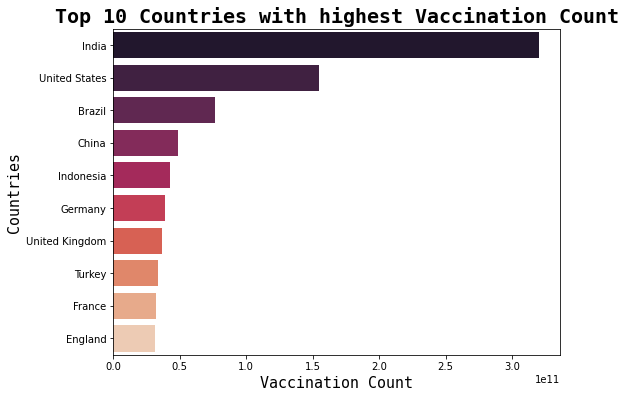

In [17]:
plt.figure(figsize=[8,6])
sb.barplot(data = top_10_countries.head(10), x = 'total_vaccinations', y = "country", palette = 'rocket')
plt.title('Top 10 Countries with highest Vaccination Count', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Vaccination Count', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Countries', fontdict={'fontname':'Monospace', 'fontsize': 15,})

In [18]:
top_10_countries = top_10_countries.sort_values(by = 'total_vaccinations', ascending = True)
top_10_countries

,country,total_vaccinations
22,Burundi,6.340000e+03
3,Andorra,1.526900e+04
52,French Polynesia,1.625200e+04
61,Grenada,2.433600e+04
53,Gabon,3.359100e+04
...,...,...
73,Indonesia,4.272175e+10
29,China,4.858702e+10
19,Brazil,7.637582e+10
162,United States,1.550138e+11


Text(0, 0.5, 'Countries')

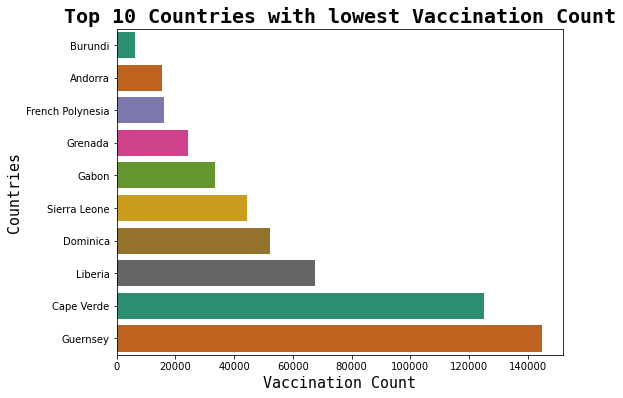

In [19]:
plt.figure(figsize=[8,6])
sb.barplot(data = top_10_countries.head(10), x = 'total_vaccinations', y = "country", palette = 'Dark2')
plt.title('Top 10 Countries with lowest Vaccination Count', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Vaccination Count', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Countries', fontdict={'fontname':'Monospace', 'fontsize': 15,})

In [58]:
vac = pd.DataFrame(data['vaccines'].value_counts()).reset_index()
vac.rename(columns = {'index':'Name', 'vaccines':'Count'}, inplace = True)
vac = vac.head(10)
vac

,Name,Count
0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",4832
1,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2981
2,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",2647
3,"Johnson&Johnson, Moderna, Pfizer/BioNTech",1808
4,"Moderna, Pfizer/BioNTech",1334
5,"Oxford/AstraZeneca, Pfizer/BioNTech",1121
6,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",1083
7,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",973
8,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",838
9,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",592


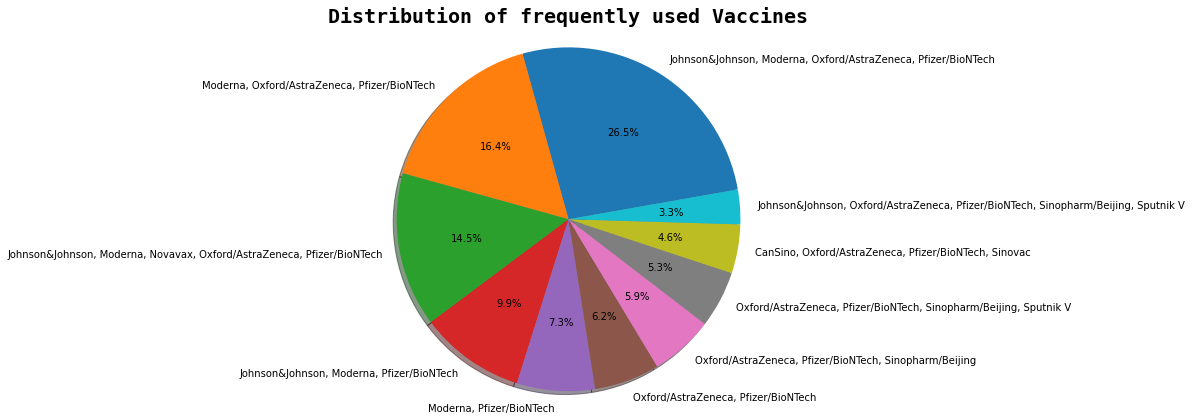

In [92]:
plt.figure(figsize=[10,7])
plt.pie(vac.Count, labels = vac.Name, startangle = 10, shadow = True, autopct = '%1.1f%%')
plt.title('Distribution of frequently used Vaccines', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
#plt.legend()
plt.axis('equal')
plt.show()

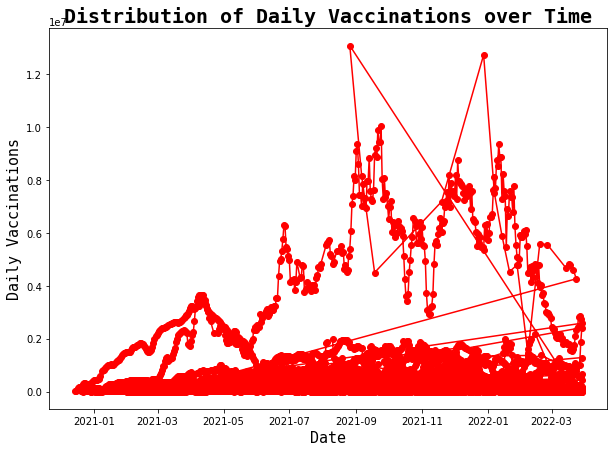

In [127]:
plt.figure(figsize=(10, 7))
plt.plot(data['date'], data['daily_vaccinations'], marker = 'o', color = 'r')
plt.title('Distribution of Daily Vaccinations over Time', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Daily Vaccinations', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

Text(0, 0.5, 'Count')

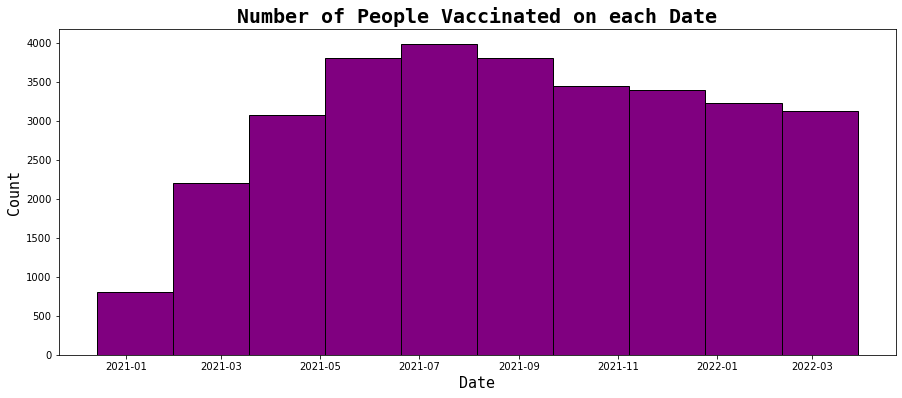

In [128]:
plt.figure(figsize=[15,6])
plt.hist(data = data, x = 'date', color = 'purple', ec = 'black')
plt.title('Number of People Vaccinated on each Date', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Count', fontdict={'fontname':'Monospace', 'fontsize': 15,})

In [21]:
count = data['source_name'].value_counts()
count = count.head(10)
count

Ministry of Health                            7488
Government of the United Kingdom              2169
World Health Organization                     1184
Federal Office of Public Health                883
Centers for Disease Control and Prevention     470
Government of Israel                           465
National Health Board                          457
Robert Koch Institut                           457
Statens Serum Institute                        455
National Health Service                        454
Name: source_name, dtype: int64

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

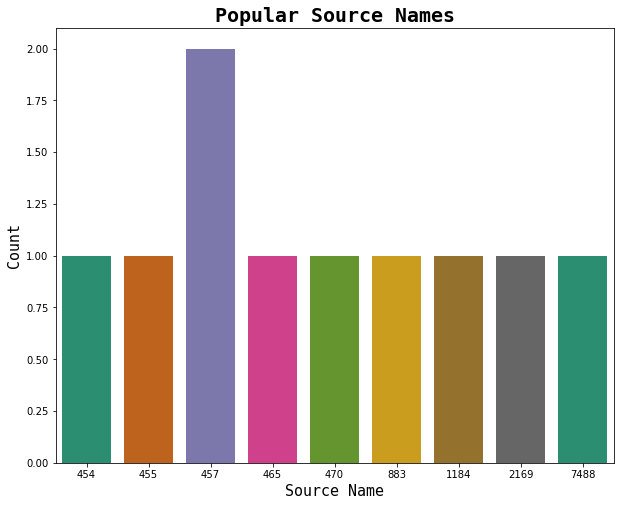

In [22]:
plt.figure(figsize=[10,8])
sb.countplot(count, palette = 'Dark2')
plt.title('Popular Source Names', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Source Name', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Count', fontdict={'fontname':'Monospace', 'fontsize': 15,})

#### Time series plots to visualize vaccination progress over time

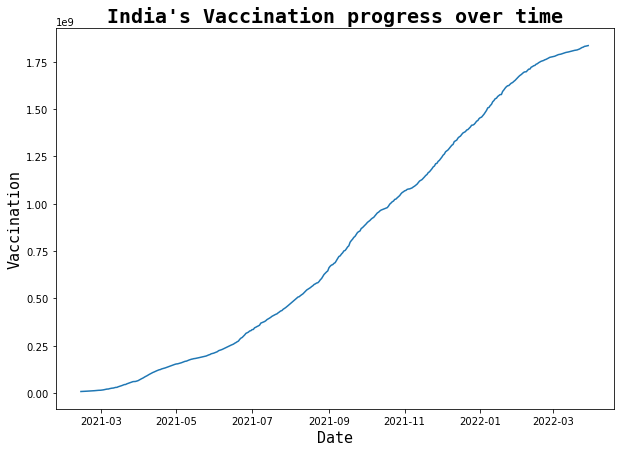

In [97]:
plt.figure(figsize=(10,7))
c = data[data['country'] == 'India']
plt.plot(c['date'], c['total_vaccinations'])
plt.title("India's Vaccination progress over time", fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Vaccination', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

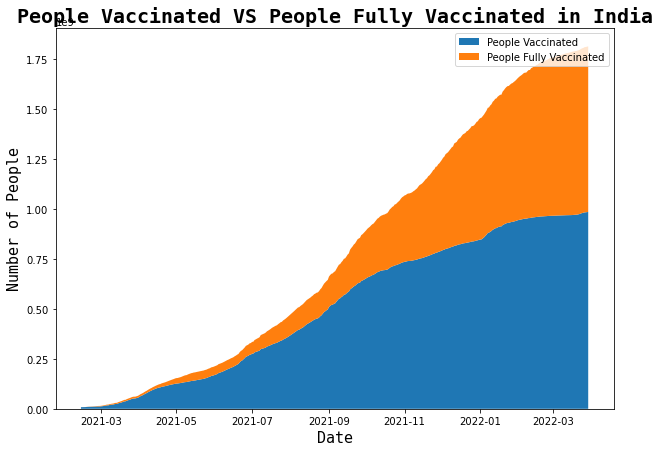

In [136]:
country= data[data['country'] == 'India']
plt.figure(figsize=(10,7))
plt.stackplot(country['date'], country['people_vaccinated'], country['people_fully_vaccinated'],
              labels=['People Vaccinated', 'People Fully Vaccinated'])
plt.title('People Vaccinated VS People Fully Vaccinated in India', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.legend()
plt.show()

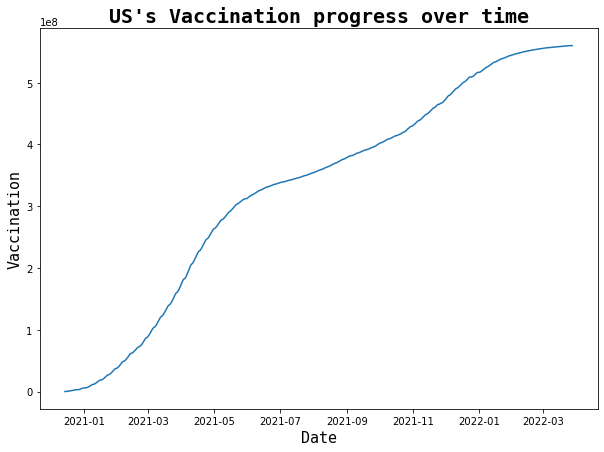

In [118]:
plt.figure(figsize=(10,7))
c = data[data['country'] == 'United States']
plt.plot(c['date'], c['total_vaccinations'])
plt.title("US's Vaccination progress over time", fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Vaccination', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

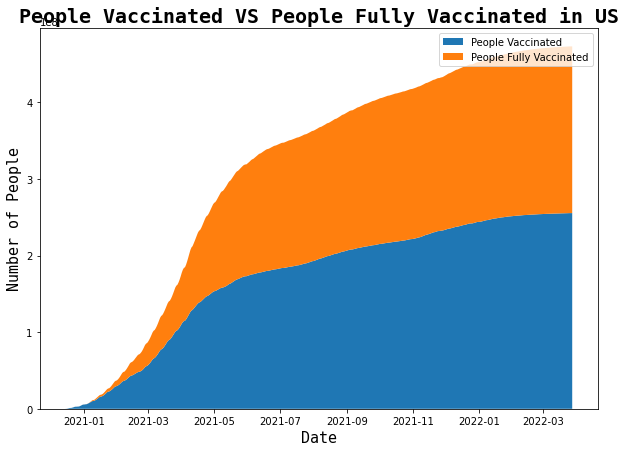

In [135]:
country= data[data['country'] == 'United States']
plt.figure(figsize=(10,7))
plt.stackplot(country['date'], country['people_vaccinated'], country['people_fully_vaccinated'],
              labels=['People Vaccinated', 'People Fully Vaccinated'])
plt.title('People Vaccinated VS People Fully Vaccinated in US', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.legend()
plt.show()

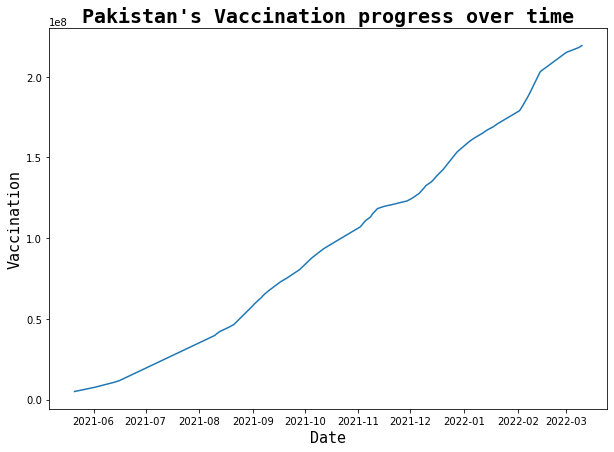

In [133]:
plt.figure(figsize=(10,7))
c = data[data['country'] == 'Pakistan']
plt.plot(c['date'], c['total_vaccinations'])
plt.title("Pakistan's Vaccination progress over time", fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Vaccination', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

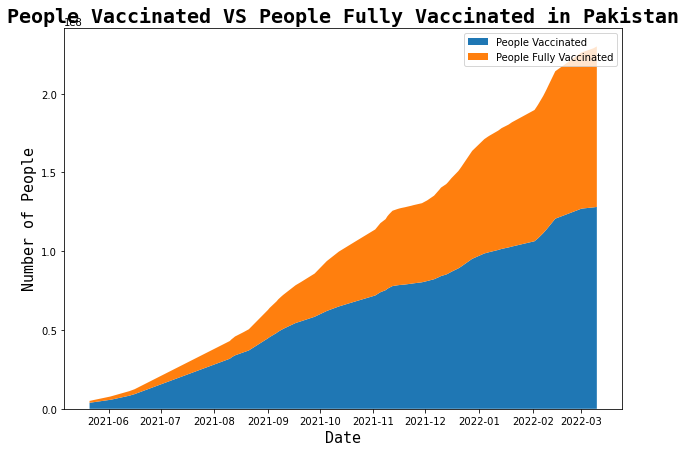

In [134]:
country= data[data['country'] == 'Pakistan']
plt.figure(figsize=(10,7))
plt.stackplot(country['date'], country['people_vaccinated'], country['people_fully_vaccinated'],
              labels=['People Vaccinated', 'People Fully Vaccinated'])
plt.title('People Vaccinated VS People Fully Vaccinated in Pakistan', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.legend()
plt.show()

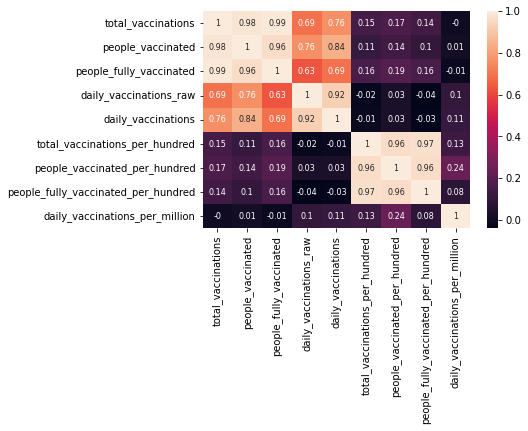

In [113]:
sb.heatmap(data=data.corr().round(2), annot=True, annot_kws={"size":8})
plt.show()